# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import numpy as np
os.makedirs('data', exist_ok = True)

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Check in and security at T5 ...
1,Not Verified | LHR T5 BA Gold Wing worked wel...
2,Not Verified | Very good service on this rout...
3,✅ Trip Verified | Flight mainly let down by ...
4,✅ Trip Verified | Another awful experience b...


In [ ]:
df.size

1000

In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
df.head()

,reviews
0,✅ Trip Verified | Check in and security at T5 ...
1,Not Verified | LHR T5 BA Gold Wing worked wel...
2,Not Verified | Very good service on this rout...
3,✅ Trip Verified | Flight mainly let down by ...
4,✅ Trip Verified | Another awful experience b...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
# Function to extract Verification details from the reviews.

def extract_verified(text):
    if "Trip Verified" in text:
        return "Verified"
    elif "Not Verified" in text:
        return "Not Verified"
    else:
        return "Unknown"

In [ ]:
df['verified_status'] = df['reviews'].apply(extract_verified)

In [ ]:
df.head()

,reviews,verified_status
0,✅ Trip Verified | Check in and security at T5 ...,Verified
1,Not Verified | LHR T5 BA Gold Wing worked wel...,Not Verified
2,Not Verified | Very good service on this rout...,Not Verified
3,✅ Trip Verified | Flight mainly let down by ...,Verified
4,✅ Trip Verified | Another awful experience b...,Verified


### Data Cleaning




In [ ]:
!pip install emoji

In [ ]:
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def full_clean(text):
    # Remove emojis
    text = emoji.replace_emoji(text, replace="")

    # Remove 'Trip Verified' or 'Not Verified'
    text = re.sub(r'\bTrip Verified\b|\bNot Verified\b', '', text, flags=re.IGNORECASE)

    # Remove pipes and extra whitespace
    text = re.sub(r'\|', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    return ' '.join(cleaned_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['cleaned_reviews'] = df['reviews'].apply(full_clean)

In [ ]:
df.head()

,reviews,verified_status,cleaned_reviews
0,✅ Trip Verified | Check in and security at T5 ...,Verified,check security quick gallery lounge pretty muc...
1,Not Verified | LHR T5 BA Gold Wing worked wel...,Not Verified,lhr ba gold wing worked well pleasant check fa...
2,Not Verified | Very good service on this rout...,Not Verified,good service route ba th march cabin crew work...
3,✅ Trip Verified | Flight mainly let down by ...,Verified,flight mainly let disagreeable flight attendan...
4,✅ Trip Verified | Another awful experience b...,Verified,another awful experience british airway flight...


### WordCloud

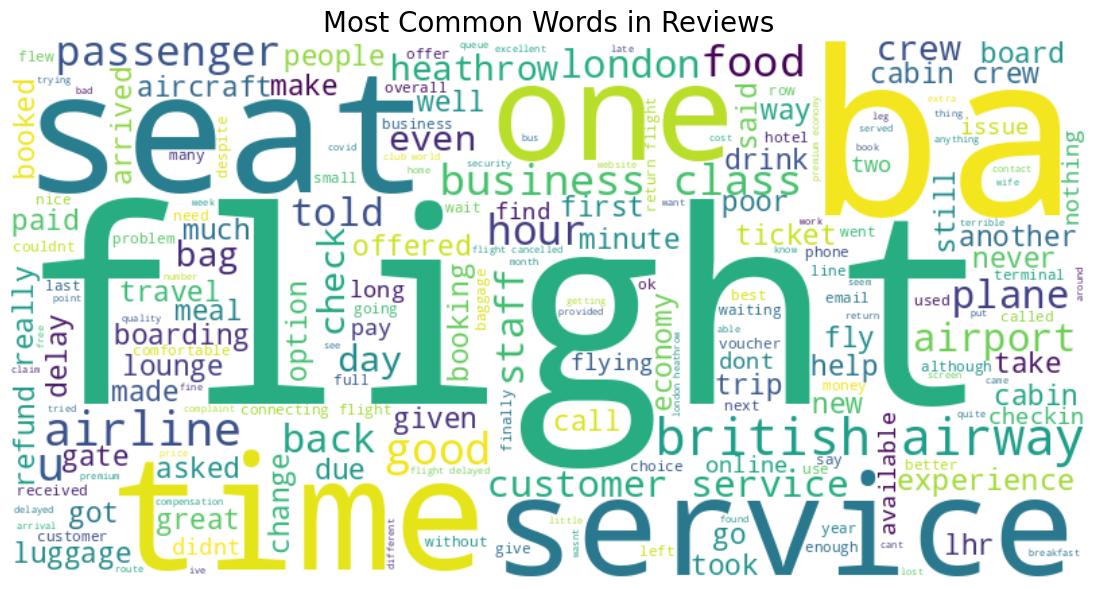

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned reviews into one big string
text = ' '.join(df['cleaned_reviews'].dropna())

# Create the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text)

# Plot the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews", fontsize=20)
plt.show()


### Sentiment Analysis using Textblob

In [ ]:
# Create column using TextBlob
from textblob import TextBlob

def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_sentiment'] = df['cleaned_reviews'].apply(textblob_sentiment)


In [ ]:
df.head()

,reviews,verified_status,cleaned_reviews,textblob_sentiment
0,✅ Trip Verified | Check in and security at T5 ...,Verified,check security quick gallery lounge pretty muc...,Positive
1,Not Verified | LHR T5 BA Gold Wing worked wel...,Not Verified,lhr ba gold wing worked well pleasant check fa...,Positive
2,Not Verified | Very good service on this rout...,Not Verified,good service route ba th march cabin crew work...,Negative
3,✅ Trip Verified | Flight mainly let down by ...,Verified,flight mainly let disagreeable flight attendan...,Positive
4,✅ Trip Verified | Another awful experience b...,Verified,another awful experience british airway flight...,Negative


In [ ]:
df['textblob_sentiment'].value_counts()

,count
textblob_sentiment,
Neutral,433
Positive,392
Negative,175


### Sentiment Analysis using spacy

In [ ]:
! pip install spacy spacytextblob

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the base English model
nlp = spacy.load("en_core_web_sm")

# Add spacytextblob to the pipeline
nlp.add_pipe("spacytextblob")


In [ ]:
doc = nlp("This was an amazing flight. Excellent service!")
print("Polarity:", doc._.blob.polarity)
print("Subjectivity:", doc._.blob.subjectivity)


Polarity: 0.8
Subjectivity: 0.95


In [ ]:
def get_spacy_sentiment(text):
    try:
        doc = nlp(text)
        polarity = doc._.blob.polarity
        if polarity > 0.1:
            return "Positive"
        elif polarity < -0.1:
            return "Negative"
        else:
            return "Neutral"
    except:
        return None

df['spacy_sentiment'] = df['cleaned_reviews'].apply(get_spacy_sentiment)


In [ ]:
df.head(10)

,reviews,verified_status,cleaned_reviews,textblob_sentiment,spacy_sentiment
0,✅ Trip Verified | Check in and security at T5 ...,Verified,check security quick gallery lounge pretty muc...,Positive,Positive
1,Not Verified | LHR T5 BA Gold Wing worked wel...,Not Verified,lhr ba gold wing worked well pleasant check fa...,Positive,Positive
2,Not Verified | Very good service on this rout...,Not Verified,good service route ba th march cabin crew work...,Negative,Negative
3,✅ Trip Verified | Flight mainly let down by ...,Verified,flight mainly let disagreeable flight attendan...,Positive,Positive
4,✅ Trip Verified | Another awful experience b...,Verified,another awful experience british airway flight...,Negative,Negative
5,"✅ Trip Verified | The service was rude, full...",Verified,service rude full attitude food poorly service...,Neutral,Neutral
6,✅ Trip Verified | This flight was a joke. Th...,Verified,flight joke four people business class includi...,Negative,Negative
7,✅ Trip Verified | This time British Airways ...,Verified,time british airway managed get everything rig...,Positive,Positive
8,"✅ Trip Verified | The seats were excellent, ...",Verified,seat excellent feel much room official seat pi...,Positive,Positive
9,✅ Trip Verified | After the nightmare of get...,Verified,nightmare getting triple security nairobi airp...,Neutral,Neutral


In [ ]:
pd.crosstab(df['textblob_sentiment'], df['spacy_sentiment'])


spacy_sentiment,Negative,Neutral,Positive
textblob_sentiment,,,
Negative,175,0,0
Neutral,0,433,0
Positive,0,0,392


### Sentiment Analysis using huggingface pretrained models

In [ ]:
! pip install transformers scipy

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

In [ ]:
# !pip install numpy==1.26.0 --force-reinstall

In [ ]:
import os
os.environ["HF_TOKEN"] = "Your_HF_TOKEN"

In [ ]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta,token=os.getenv("HF_TOKEN"))
tokenizer = AutoTokenizer.from_pretrained(roberta, token=os.getenv("HF_TOKEN"))

labels = ['Negative', 'Neutral', 'Positive']

In [ ]:
def get_sentiment(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    labels = ['Negative', 'Neutral', 'Positive']
    return labels[scores.argmax()]

In [ ]:
df['hf_sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

In [ ]:
df.head()

,reviews,verified_status,cleaned_reviews,textblob_sentiment,spacy_sentiment,hf_sentiment
0,✅ Trip Verified | Check in and security at T5 ...,Verified,check security quick gallery lounge pretty muc...,Positive,Positive,Positive
1,Not Verified | LHR T5 BA Gold Wing worked wel...,Not Verified,lhr ba gold wing worked well pleasant check fa...,Positive,Positive,Positive
2,Not Verified | Very good service on this rout...,Not Verified,good service route ba th march cabin crew work...,Negative,Negative,Positive
3,✅ Trip Verified | Flight mainly let down by ...,Verified,flight mainly let disagreeable flight attendan...,Positive,Positive,Neutral
4,✅ Trip Verified | Another awful experience b...,Verified,another awful experience british airway flight...,Negative,Negative,Negative


In [ ]:
pd.crosstab(df['textblob_sentiment'], df['hf_sentiment'])

hf_sentiment,Negative,Neutral,Positive
textblob_sentiment,,,
Negative,158,16,1
Neutral,275,128,30
Positive,53,91,248


Finally we decided to go with the hugging face sentiment analysis

### Data Visualization

<ipython-input-32-6646ca2d3328>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


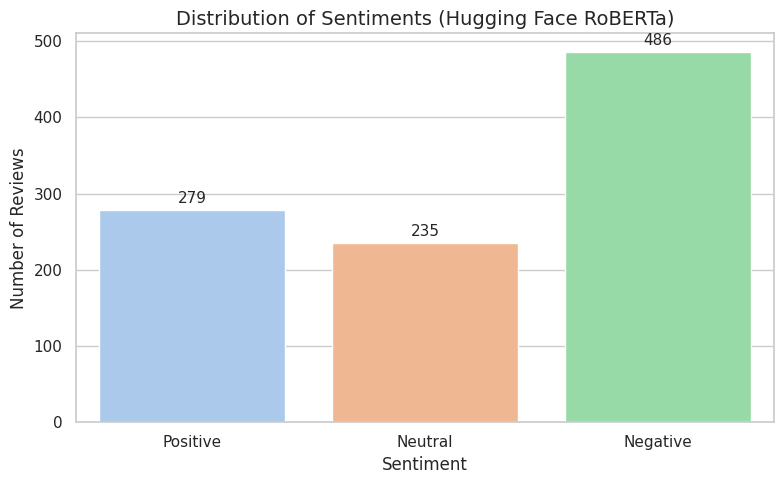

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")
sentiment_counts = df['hf_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')

plt.title("Distribution of Sentiments (Hugging Face RoBERTa)", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Show values on top of bars
for i, val in enumerate(sentiment_counts.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

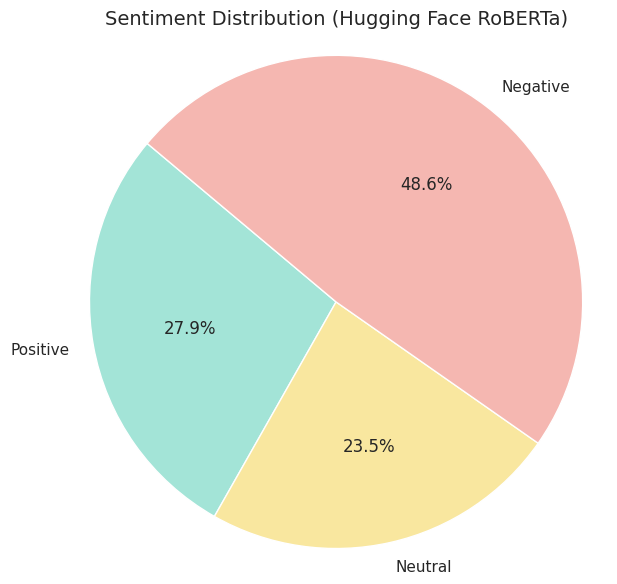

In [ ]:
plt.figure(figsize=(7, 7))
colors = ['#a3e4d7', '#f9e79f', '#f5b7b1']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sentiment Distribution (Hugging Face RoBERTa)", fontsize=14)
plt.axis('equal')
plt.show()

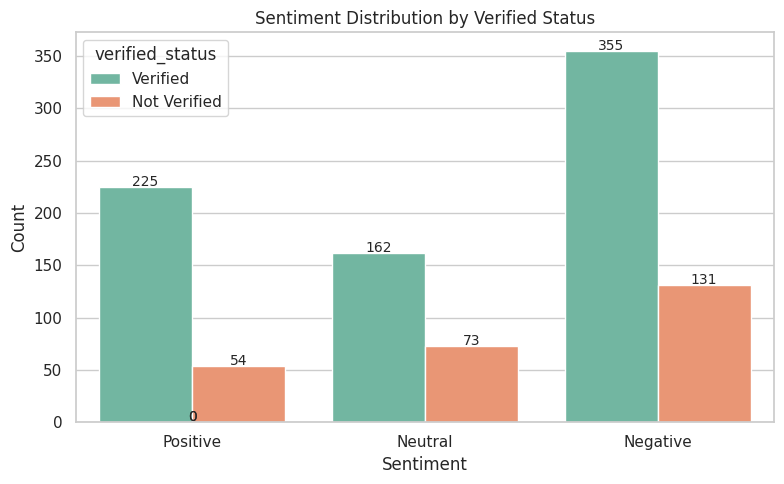

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='hf_sentiment', hue='verified_status', palette='Set2')

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            int(height), ha="center", fontsize=10)

plt.title('Sentiment Distribution by Verified Status')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Topic Modelling

In [ ]:
! pip install bertopic
! pip install -U sentence-transformers
! pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


In [ ]:
! pip install -U safetensors

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2", token = os.getenv("HF_TOKEN"))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model=embedding_model, language="english", verbose=True)


In [ ]:
docs = df['cleaned_reviews'].dropna().tolist()

topics, probs = topic_model.fit_transform(docs)


2025-04-10 08:25:45,781 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-04-10 08:25:48,524 - BERTopic - Embedding - Completed ✓
2025-04-10 08:25:48,527 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-10 08:26:07,833 - BERTopic - Dimensionality - Completed ✓
2025-04-10 08:26:07,835 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-10 08:26:07,869 - BERTopic - Cluster - Completed ✓
2025-04-10 08:26:07,876 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-10 08:26:07,963 - BERTopic - Representation - Completed ✓


In [ ]:
# Overview of topics
topic_model.visualize_topics()

In [ ]:
# Hierarchical clustering
topic_model.visualize_hierarchy()


In [ ]:
df['bertopic_topic'] = topics


In [ ]:
topic_info = topic_model.get_topic_info()
print(topic_info.head())
print(topic_info.size)

   Topic  Count                          Name  \
0     -1    363     -1_flight_ba_seat_service   
1      0    206       0_good_flight_crew_food   
2      1    134  1_flight_ba_cancelled_refund   
3      2     85      2_class_seat_business_ba   
4      3     71    3_flight_ba_british_airway   

                                      Representation  \
0  [flight, ba, seat, service, hour, london, clas...   
1  [good, flight, crew, food, ba, time, cabin, se...   
2  [flight, ba, cancelled, refund, customer, vouc...   
3  [class, seat, business, ba, flight, service, c...   
4  [flight, ba, british, airway, customer, hour, ...   

                                 Representative_Docs  
0  [travelled london doha july th physically chec...  
1  [flew british airway ba london heathrow amster...  
2  [flew ba recently sydney london deciding retur...  
3  [checkin process smooth got access iga lounge ...  
4  [itinerary supposed la vegaschicagolondonvenic...  
50


In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_topics()